In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
mensual = pd.read_csv('mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [6]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [7]:
mensual_p = mensual['n_trips']

In [8]:
mensual_p

,n_trips
pickup_datetime,
2022-03-31,3075023
2022-04-30,3004149
2022-05-31,2926385
2022-06-30,2917367
2022-07-31,2627194
2022-08-31,2600258
2022-09-30,2552011
2022-10-31,2975223
2022-11-30,2639133


In [9]:
mensual_p = mensual_p.reset_index()

In [10]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2022-03-31,3075023
1,2022-04-30,3004149
2,2022-05-31,2926385
3,2022-06-30,2917367
4,2022-07-31,2627194
5,2022-08-31,2600258
6,2022-09-30,2552011
7,2022-10-31,2975223
8,2022-11-30,2639133
9,2022-12-31,2729661


## Modelo

In [14]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, uncertainty_samples = 1000, mcmc_samples=100, interval_width= 0.7, seasonality_prior_scale=1,changepoint_prior_scale =0.06)

# Entrenamos el modelo
prophet_1.fit(mensual_p)

mape = 0.05
cov = 1
n = 12
forecast_1 = pd.DataFrame()
df_cv_1 = pd.DataFrame()
df_p_1 = pd.DataFrame()
while mape < 0.08 and cov > 0.9:
  mape_pre = mape
  cov_pre = cov
  forecast_pre = forecast_1
  df_cv_pre = df_cv_1
  df_p_pre = df_p_1
  build_forecast = prophet_1.make_future_dataframe(periods=n, freq='M') #
  forecast_1 = prophet_1.predict(build_forecast)
  df_cv_1 = cross_validation(prophet_1, initial = '365 days', horizon = '365 days')
  df_p_1 = performance_metrics(df_cv_1)
  mape = df_p_1.mape.mean()
  cov = df_p_1.coverage.mean()
  n += 6

print('Prediccion de hasta', (n-6)/12, 'años')
print('El mape es:', mape_pre)
print('El coverage es:', cov_pre)

forecast_pre

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/sfhd8jra.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/m32le2tg.json
03:11:41 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=42412', 'data', 'file=/tmp/tmpxnhyilkg/sfhd8jra.json', 'init=/tmp/tmpxnhyilkg/m32le2tg.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelg8byokqq/prophet_model-20241119031142_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=42412', 'data', 'file=/tmp/tmpxnhyilkg/sfhd8jra.json', 'init=/tmp/tmpxnhyilkg/m32le2tg.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelg8byokqq/prophet_model-20241119031142_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:11:44 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=42412', 'data', 'file=/tmp/tmpxnhyilkg/sfhd8jra.json', 'init=/tmp/tmpxnhyilkg/m32le2tg.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelg8byokqq/prophet_model-20241119031142_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxnhyilkg/prophet_modelg8byokqq/prophet_model-20241119031142_1.csv
 console_msgs (if any):
	/tmp/tmpxnhyilkg/prophet_modelg8byokqq/prophet_model-20241119031142_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/iqjk18ps.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/txgr3tye.json
03:11:45 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=59457', 'data', 'file=/tmp/tmpxnhyilkg/iqjk18ps.json', 'init=/tmp/tmpxnhyilkg/txgr3tye.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelysxq8pqq/prophet_model-20241119031145_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=59457', 'data', 'file=/tmp/tmpxnhyilkg/iqjk18ps.json', 'init=/tmp/tmpxnhyilkg/txgr3tye.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelysxq8pqq/prophet_model-20241119031145_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:11:48 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=59457', 'data', 'file=/tmp/tmpxnhyilkg/iqjk18ps.json', 'init=/tmp/tmpxnhyilkg/txgr3tye.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelysxq8pqq/prophet_model-20241119031145_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxnhyilkg/prophet_modelysxq8pqq/prophet_model-20241119031145_1.csv
 console_msgs (if any):
	/tmp/tmpxnhyilkg/prophet_modelysxq8pqq/prophet_model-20241119031145_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/3v6hvok7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/3dpax2_z.json
03:11:48 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=17784', 'data', 'file=/tmp/tmpxnhyilkg/3v6hvok7.json', 'init=/tmp/tmpxnhyilkg/3dpax2_z.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modeljwere_ph/prophet_model-20241119031148_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=17784', 'data', 'file=/tmp/tmpxnhyilkg/3v6hvok7.json', 'init=/tmp/tmpxnhyilkg/3dpax2_z.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modeljwere_ph/prophet_model-20241119031148_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:11:51 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=17784', 'data', 'file=/tmp/tmpxnhyilkg/3v6hvok7.json', 'init=/tmp/tmpxnhyilkg/3dpax2_z.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modeljwere_ph/prophet_model-20241119031148_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxnhyilkg/prophet_modeljwere_ph/prophet_model-20241119031148_1.csv
 console_msgs (if any):
	/tmp/tmpxnhyilkg/prophet_modeljwere_ph/prophet_model-20241119031148_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/5jxwm0cx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/9fbn7_id.json
03:11:51 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=57432', 'data', 'file=/tmp/tmpxnhyilkg/5jxwm0cx.json', 'init=/tmp/tmpxnhyilkg/9fbn7_id.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_model9nwdh8nx/prophet_model-20241119031152_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=57432', 'data', 'file=/tmp/tmpxnhyilkg/5jxwm0cx.json', 'init=/tmp/tmpxnhyilkg/9fbn7_id.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_model9nwdh8nx/prophet_model-20241119031152_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:11:54 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=57432', 'data', 'file=/tmp/tmpxnhyilkg/5jxwm0cx.json', 'init=/tmp/tmpxnhyilkg/9fbn7_id.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_model9nwdh8nx/prophet_model-20241119031152_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxnhyilkg/prophet_model9nwdh8nx/prophet_model-20241119031152_1.csv
 console_msgs (if any):
	/tmp/tmpxnhyilkg/prophet_model9nwdh8nx/prophet_model-20241119031152_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/42d27xga.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/c7_jl7b0.json
03:11:55 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=1260', 'data', 'file=/tmp/tmpxnhyilkg/42d27xga.json', 'init=/tmp/tmpxnhyilkg/c7_jl7b0.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelzswv9d1o/prophet_model-20241119031155_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=1260', 'data', 'file=/tmp/tmpxnhyilkg/42d27xga.json', 'init=/tmp/tmpxnhyilkg/c7_jl7b0.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelzswv9d1o/prophet_model-20241119031155_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:

03:11:58 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=1260', 'data', 'file=/tmp/tmpxnhyilkg/42d27xga.json', 'init=/tmp/tmpxnhyilkg/c7_jl7b0.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelzswv9d1o/prophet_model-20241119031155_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxnhyilkg/prophet_modelzswv9d1o/prophet_model-20241119031155_1.csv
 console_msgs (if any):
	/tmp/tmpxnhyilkg/prophet_modelzswv9d1o/prophet_model-20241119031155_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)
 

INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/i3x0932l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/s39cyjoh.json
03:11:59 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=39462', 'data', 'file=/tmp/tmpxnhyilkg/i3x0932l.json', 'init=/tmp/tmpxnhyilkg/s39cyjoh.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modeljvycbizv/prophet_model-20241119031159_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=39462', 'data', 'file=/tmp/tmpxnhyilkg/i3x0932l.json', 'init=/tmp/tmpxnhyilkg/s39cyjoh.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modeljvycbizv/prophet_model-20241119031159_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:12:01 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=39462', 'data', 'file=/tmp/tmpxnhyilkg/i3x0932l.json', 'init=/tmp/tmpxnhyilkg/s39cyjoh.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modeljvycbizv/prophet_model-20241119031159_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxnhyilkg/prophet_modeljvycbizv/prophet_model-20241119031159_1.csv
 console_msgs (if any):
	/tmp/tmpxnhyilkg/prophet_modeljvycbizv/prophet_model-20241119031159_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/6sie75n0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/imctr95m.json
03:12:02 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=48404', 'data', 'file=/tmp/tmpxnhyilkg/6sie75n0.json', 'init=/tmp/tmpxnhyilkg/imctr95m.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelid12s7h_/prophet_model-20241119031202_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=48404', 'data', 'file=/tmp/tmpxnhyilkg/6sie75n0.json', 'init=/tmp/tmpxnhyilkg/imctr95m.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelid12s7h_/prophet_model-20241119031202_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:12:05 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=48404', 'data', 'file=/tmp/tmpxnhyilkg/6sie75n0.json', 'init=/tmp/tmpxnhyilkg/imctr95m.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelid12s7h_/prophet_model-20241119031202_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxnhyilkg/prophet_modelid12s7h_/prophet_model-20241119031202_1.csv
 console_msgs (if any):
	/tmp/tmpxnhyilkg/prophet_modelid12s7h_/prophet_model-20241119031202_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/mpemya7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/4z0cxzmo.json
03:12:05 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=17981', 'data', 'file=/tmp/tmpxnhyilkg/mpemya7l.json', 'init=/tmp/tmpxnhyilkg/4z0cxzmo.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelu46bedg9/prophet_model-20241119031205_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=17981', 'data', 'file=/tmp/tmpxnhyilkg/mpemya7l.json', 'init=/tmp/tmpxnhyilkg/4z0cxzmo.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelu46bedg9/prophet_model-20241119031205_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:12:08 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=17981', 'data', 'file=/tmp/tmpxnhyilkg/mpemya7l.json', 'init=/tmp/tmpxnhyilkg/4z0cxzmo.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelu46bedg9/prophet_model-20241119031205_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxnhyilkg/prophet_modelu46bedg9/prophet_model-20241119031205_1.csv
 console_msgs (if any):
	/tmp/tmpxnhyilkg/prophet_modelu46bedg9/prophet_model-20241119031205_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/n0n3scsm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/nrdr_6kw.json
03:12:09 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=42777', 'data', 'file=/tmp/tmpxnhyilkg/n0n3scsm.json', 'init=/tmp/tmpxnhyilkg/nrdr_6kw.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modela09qr99y/prophet_model-20241119031209_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=42777', 'data', 'file=/tmp/tmpxnhyilkg/n0n3scsm.json', 'init=/tmp/tmpxnhyilkg/nrdr_6kw.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modela09qr99y/prophet_model-20241119031209_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:12:13 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=42777', 'data', 'file=/tmp/tmpxnhyilkg/n0n3scsm.json', 'init=/tmp/tmpxnhyilkg/nrdr_6kw.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modela09qr99y/prophet_model-20241119031209_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxnhyilkg/prophet_modela09qr99y/prophet_model-20241119031209_1.csv
 console_msgs (if any):
	/tmp/tmpxnhyilkg/prophet_modela09qr99y/prophet_model-20241119031209_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/7bucfkec.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/hdea61dx.json
03:12:13 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=84098', 'data', 'file=/tmp/tmpxnhyilkg/7bucfkec.json', 'init=/tmp/tmpxnhyilkg/hdea61dx.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modeljtw9bk61/prophet_model-20241119031214_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=84098', 'data', 'file=/tmp/tmpxnhyilkg/7bucfkec.json', 'init=/tmp/tmpxnhyilkg/hdea61dx.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modeljtw9bk61/prophet_model-20241119031214_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:12:16 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=84098', 'data', 'file=/tmp/tmpxnhyilkg/7bucfkec.json', 'init=/tmp/tmpxnhyilkg/hdea61dx.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modeljtw9bk61/prophet_model-20241119031214_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxnhyilkg/prophet_modeljtw9bk61/prophet_model-20241119031214_1.csv
 console_msgs (if any):
	/tmp/tmpxnhyilkg/prophet_modeljtw9bk61/prophet_model-20241119031214_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/abl35o_q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/iznna5pk.json
03:12:17 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=75502', 'data', 'file=/tmp/tmpxnhyilkg/abl35o_q.json', 'init=/tmp/tmpxnhyilkg/iznna5pk.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelisfqb4zb/prophet_model-20241119031217_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=75502', 'data', 'file=/tmp/tmpxnhyilkg/abl35o_q.json', 'init=/tmp/tmpxnhyilkg/iznna5pk.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelisfqb4zb/prophet_model-20241119031217_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:12:19 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=75502', 'data', 'file=/tmp/tmpxnhyilkg/abl35o_q.json', 'init=/tmp/tmpxnhyilkg/iznna5pk.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modelisfqb4zb/prophet_model-20241119031217_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxnhyilkg/prophet_modelisfqb4zb/prophet_model-20241119031217_1.csv
 console_msgs (if any):
	/tmp/tmpxnhyilkg/prophet_modelisfqb4zb/prophet_model-20241119031217_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/1pqwpu_0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/0tc0xhha.json
03:12:20 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=31632', 'data', 'file=/tmp/tmpxnhyilkg/1pqwpu_0.json', 'init=/tmp/tmpxnhyilkg/0tc0xhha.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modeludgh52vo/prophet_model-20241119031220_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=31632', 'data', 'file=/tmp/tmpxnhyilkg/1pqwpu_0.json', 'init=/tmp/tmpxnhyilkg/0tc0xhha.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modeludgh52vo/prophet_model-20241119031220_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:12:22 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=31632', 'data', 'file=/tmp/tmpxnhyilkg/1pqwpu_0.json', 'init=/tmp/tmpxnhyilkg/0tc0xhha.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modeludgh52vo/prophet_model-20241119031220_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxnhyilkg/prophet_modeludgh52vo/prophet_model-20241119031220_1.csv
 console_msgs (if any):
	/tmp/tmpxnhyilkg/prophet_modeludgh52vo/prophet_model-20241119031220_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/8l37hepe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/4d36ogk7.json
03:12:23 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=68400', 'data', 'file=/tmp/tmpxnhyilkg/8l37hepe.json', 'init=/tmp/tmpxnhyilkg/4d36ogk7.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_model6gx56zdf/prophet_model-20241119031223_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=68400', 'data', 'file=/tmp/tmpxnhyilkg/8l37hepe.json', 'init=/tmp/tmpxnhyilkg/4d36ogk7.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_model6gx56zdf/prophet_model-20241119031223_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:12:26 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=68400', 'data', 'file=/tmp/tmpxnhyilkg/8l37hepe.json', 'init=/tmp/tmpxnhyilkg/4d36ogk7.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_model6gx56zdf/prophet_model-20241119031223_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxnhyilkg/prophet_model6gx56zdf/prophet_model-20241119031223_1.csv
 console_msgs (if any):
	/tmp/tmpxnhyilkg/prophet_model6gx56zdf/prophet_model-20241119031223_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/abq62doa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxnhyilkg/27xmcekx.json
03:12:27 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=93269', 'data', 'file=/tmp/tmpxnhyilkg/abq62doa.json', 'init=/tmp/tmpxnhyilkg/27xmcekx.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modeldwklc_vm/prophet_model-20241119031227_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=93269', 'data', 'file=/tmp/tmpxnhyilkg/abq62doa.json', 'init=/tmp/tmpxnhyilkg/27xmcekx.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modeldwklc_vm/prophet_model-20241119031227_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

03:12:30 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=93269', 'data', 'file=/tmp/tmpxnhyilkg/abq62doa.json', 'init=/tmp/tmpxnhyilkg/27xmcekx.json', 'output', 'file=/tmp/tmpxnhyilkg/prophet_modeldwklc_vm/prophet_model-20241119031227_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpxnhyilkg/prophet_modeldwklc_vm/prophet_model-20241119031227_1.csv
 console_msgs (if any):
	/tmp/tmpxnhyilkg/prophet_modeldwklc_vm/prophet_model-20241119031227_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)



Prediccion de hasta 7.0 años
El mape es: 0.07176842419455005
El coverage es: 0.9166666666666666


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-31,2.835562e+06,2.968328e+06,3.189523e+06,2.752424e+06,2.916282e+06,243456.821858,178022.180112,312737.210854,243456.821858,178022.180112,312737.210854,0.0,0.0,0.0,3.079019e+06
1,2022-04-30,2.821642e+06,2.860669e+06,3.079617e+06,2.750767e+06,2.891851e+06,145301.816166,76494.897098,216773.914304,145301.816166,76494.897098,216773.914304,0.0,0.0,0.0,2.966944e+06
2,2022-05-31,2.807146e+06,2.927749e+06,3.142078e+06,2.741941e+06,2.864704e+06,230191.890862,149372.021901,306678.021851,230191.890862,149372.021901,306678.021851,0.0,0.0,0.0,3.037338e+06
3,2022-06-30,2.794332e+06,2.830163e+06,3.028510e+06,2.732510e+06,2.847136e+06,134099.685906,55280.868563,205014.069847,134099.685906,55280.868563,205014.069847,0.0,0.0,0.0,2.928432e+06
4,2022-07-31,2.780861e+06,2.484551e+06,2.702985e+06,2.723040e+06,2.834076e+06,-190943.956024,-262506.687832,-117437.979518,-190943.956024,-262506.687832,-117437.979518,0.0,0.0,0.0,2.589917e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2030-10-31,3.671604e+06,5.993312e+05,7.104567e+06,4.642342e+05,6.869033e+06,232659.098643,136571.855700,336661.372655,232659.098643,136571.855700,336661.372655,0.0,0.0,0.0,3.904263e+06
104,2030-11-30,3.685021e+06,3.353958e+05,6.864537e+06,4.230107e+05,6.920324e+06,-49552.314094,-112780.314935,14562.868684,-49552.314094,-112780.314935,14562.868684,0.0,0.0,0.0,3.635468e+06
105,2030-12-31,3.698885e+06,4.196659e+05,7.086650e+06,3.619345e+05,6.995476e+06,35393.350122,-40726.885068,116424.715553,35393.350122,-40726.885068,116424.715553,0.0,0.0,0.0,3.734278e+06
106,2031-01-31,3.712748e+06,2.422285e+05,7.029495e+06,3.002201e+05,7.055331e+06,-88522.982712,-191405.032464,12644.213944,-88522.982712,-191405.032464,12644.213944,0.0,0.0,0.0,3.624225e+06


In [15]:
print('Prediccion de hasta',n/12, 'años')
print('El mape es:', mape)
print('El coverage es:', cov)

Prediccion de hasta 7.5 años
El mape es: 0.0809624212873501
El coverage es: 0.9166666666666666


In [16]:
forecast_pre.to_csv('forecast_mensual_7.csv')

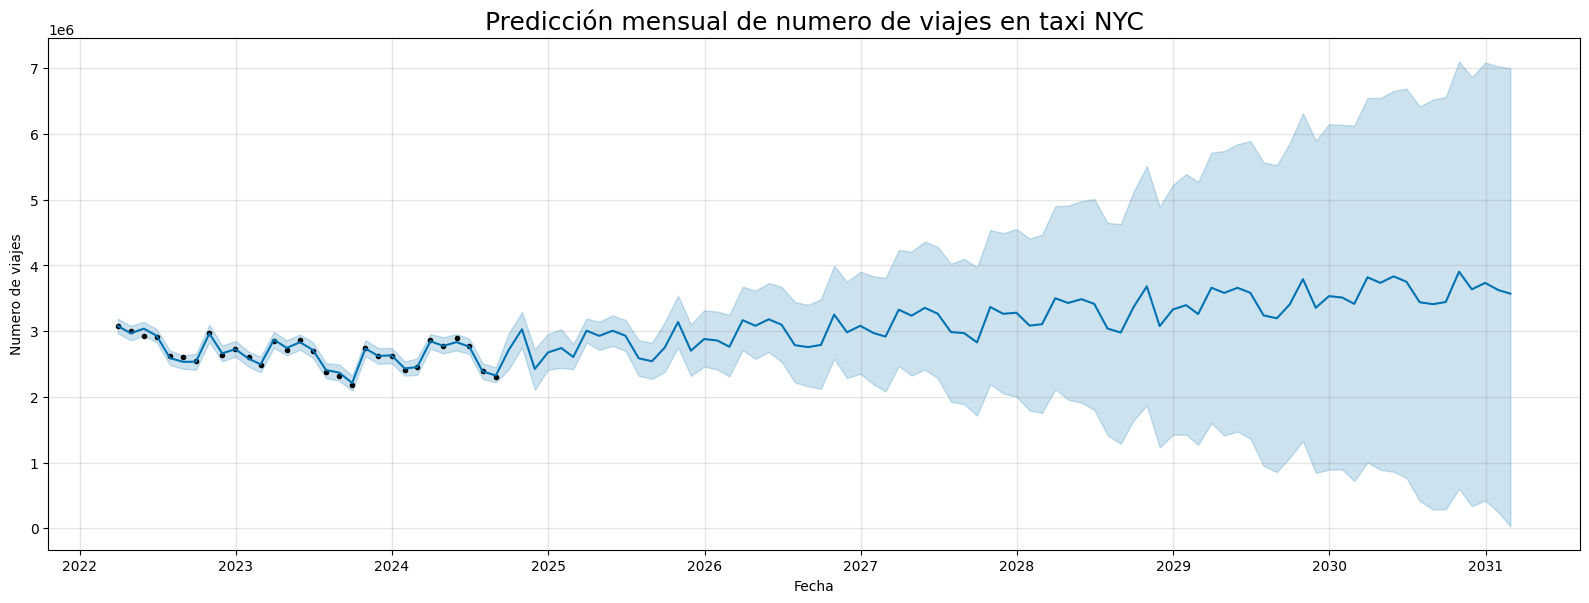

In [17]:
prophet_1.plot(forecast_pre, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

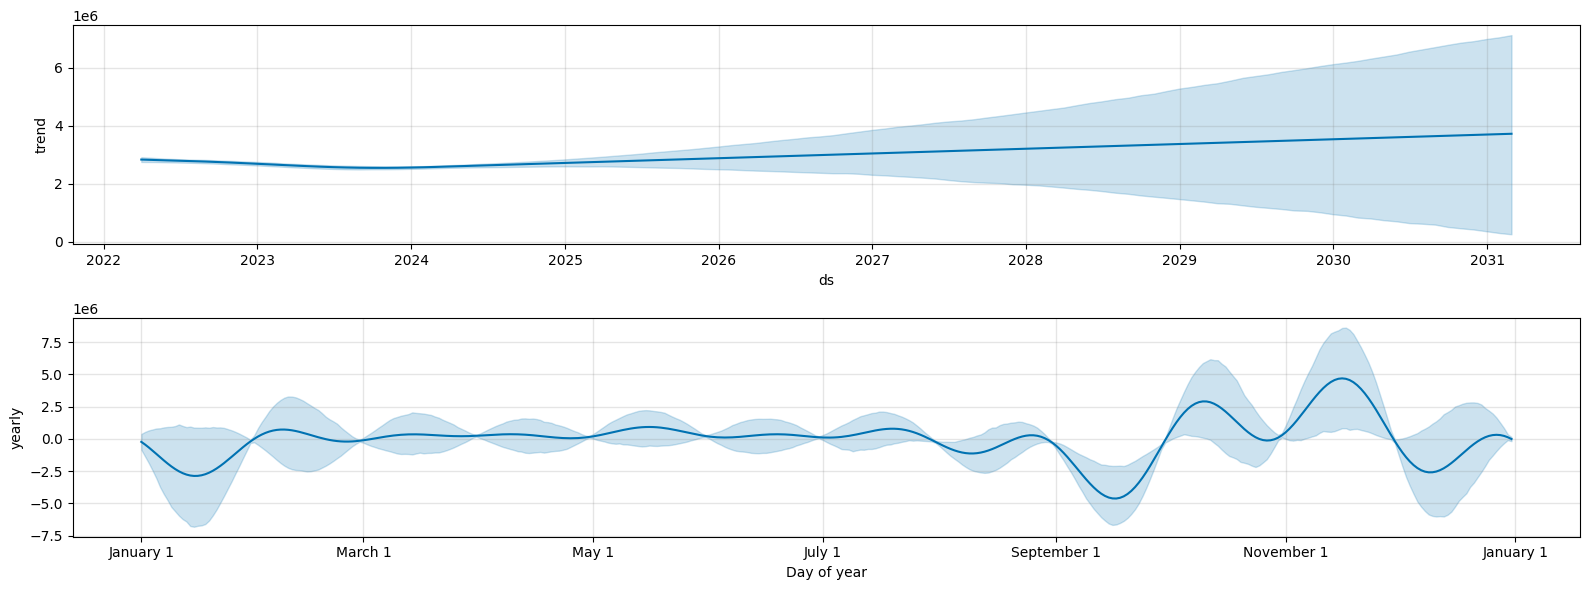

In [18]:
components = prophet_1.plot_components(forecast_pre, figsize=(16,6))

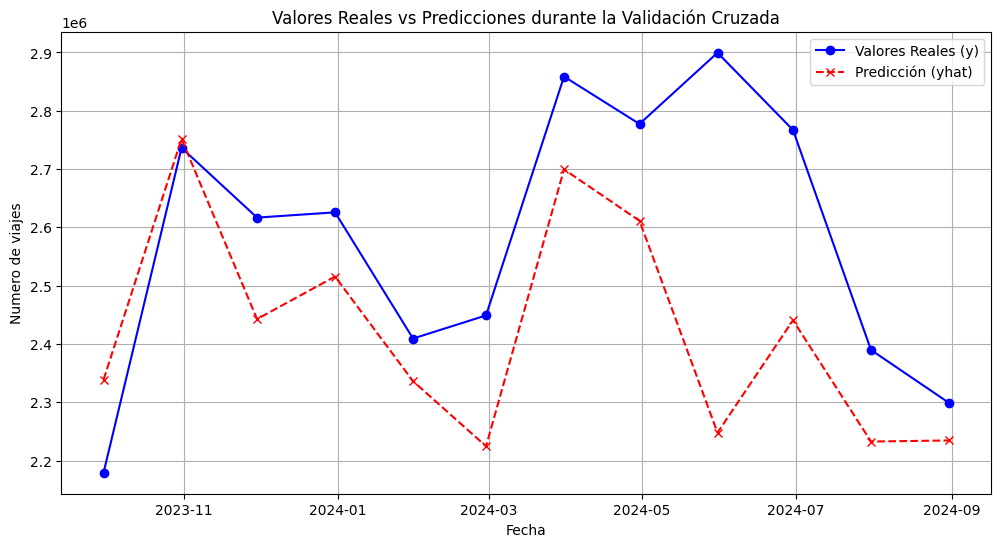

In [19]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_pre['ds'], df_cv_pre['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_pre['ds'], df_cv_pre['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()

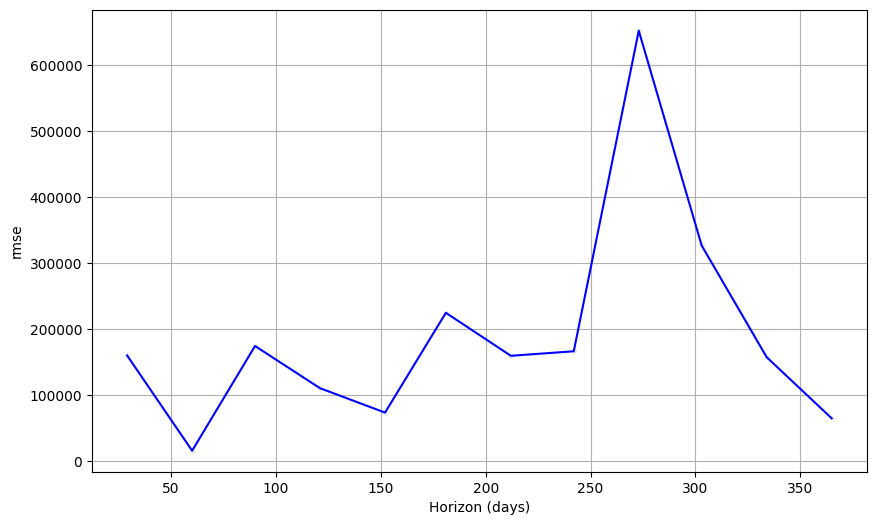

In [20]:
fig = plot_cross_validation_metric(df_cv_pre, metric='rmse')

In [21]:
df_p_pre.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,12,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,196 days 20:00:00,6.139368e+10,190120.256856,190120.256856,0.071768,0.071768,0.075715,0.916667
std,109 days 20:33:46.987269072,1.178470e+11,165961.566119,165961.566119,0.056640,0.056640,0.064168,0.288675
min,29 days 00:00:00,2.367238e+08,15385.830230,15385.830230,0.005623,0.005623,0.005607,0.000000
25%,113 days 06:00:00,1.042721e+10,100853.863150,100853.863150,0.039035,0.039035,0.039825,1.000000
50%,196 days 12:00:00,2.541987e+10,159435.906502,159435.906502,0.062757,0.062757,0.064795,1.000000
75%,280 days 12:00:00,3.529340e+10,186597.669735,186597.669735,0.077858,0.077858,0.077015,1.000000
max,365 days 00:00:00,4.246812e+11,651675.657137,651675.657137,0.224751,0.224751,0.253206,1.000000
